In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.stats import fisher_exact
from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [16]:
# Load and Scale Data (feature/row/gene-based)
expression_data = pd.read_csv('FPKM_tomato.txt', sep='\t')
sample_labels = pd.read_csv('Tomato_columns.txt', sep='\t')
name_mapping = dict(zip(sample_labels['ID '], sample_labels['description']))
expression_data.rename(columns=name_mapping, inplace=True)
gene_names = expression_data['gene_id'].tolist()
expression_values = expression_data.drop(columns=['gene_id'])

scaler = StandardScaler()
scaled_expression_values = scaler.fit_transform(expression_values.T).T
scaled_expression_df = pd.DataFrame(scaled_expression_values, index=gene_names, columns=expression_values.columns)


The following cell shows: 1) Gene-based K-means
2) Visualization
   
Supposedly, K is to be chosen from <font color=red> [20, 30, 40, 104, 119] </font>

Number of row-based clusters formed by K-Means: 10
Clusters' names (cluster_labels) are: [4 4 4 ... 4 9 1], With Shape: (34075,)
unique cluster_labels are: [0 1 2 3 4 5 6 7 8 9]
Samples in each cluster: Counter({4: 11011, 9: 3380, 0: 3075, 2: 3066, 5: 2898, 1: 2775, 8: 2189, 7: 2049, 3: 1945, 6: 1687})

Silhouette Score: 0.24062091669508856
Davies-Bouldin Index: 2.1690785911797468
Inertia: 229705.773548487


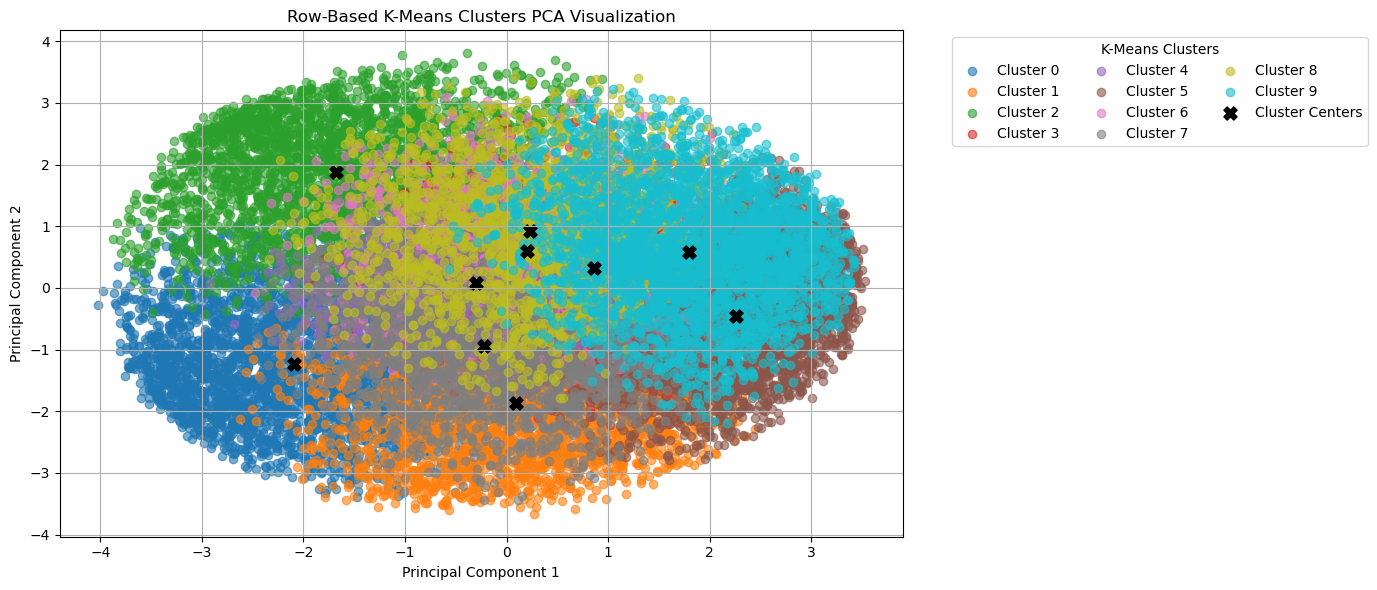

Cluster data saved in 'clusters_output' directory.


In [23]:
# Row-Based Clustering
row_k = 10
kmeans_row = KMeans(n_clusters=row_k, n_init=10, random_state=42)
kmeans_row.fit(scaled_expression_df.values)
cluster_labels = kmeans_row.labels_
cluster_centers = kmeans_row.cluster_centers_
row_clusters = [scaled_expression_df[cluster_labels == i] for i in range(row_k)]
#//////////////////////////////////////////////////////////////////////

# Confirm the unique clusters formed
print(f"Number of row-based clusters formed by K-Means: {len(np.unique(cluster_labels))}")
print(f"Clusters' names (cluster_labels) are: {cluster_labels}, With Shape: {cluster_labels.shape}")
print("unique cluster_labels are:", np.unique(cluster_labels))
# Count samples in each cluster
count_per_cluster = Counter(cluster_labels)
print("Samples in each cluster:", count_per_cluster)
#///////////////////////////////////////////////////////////////////////

# To aid in finding an appropriate K value, the code prints the following measures -->
# for the chosen K, facilitating comparisons across different K values 🙂 
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_expression_df.values, cluster_labels)
print(f'\nSilhouette Score: {silhouette_avg}')
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_expression_df.values, cluster_labels)
print(f'Davies-Bouldin Index: {db_index}')
# Calculate Inertia
inertia = kmeans_row.inertia_
print(f'Inertia: {inertia}')
#///////////////////////////////////////////////////////////////////////

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_expression_df.values)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels  # Add the cluster labels to the DataFrame

# Transform cluster centers to PCA space
pca_cluster_centers = pca.transform(cluster_centers)
# Single Plot: K-Means Clusters
plt.figure(figsize=(14, 6))
# Plot each cluster
for cluster_label, cluster_data in pca_df.groupby('Cluster'):
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}', alpha=0.6)

# Plot the cluster centers once, outside the loop
plt.scatter(pca_cluster_centers[:, 0], pca_cluster_centers[:, 1], s=90, c='black', marker='X', label='Cluster Centers')
plt.title('Row-Based K-Means Clusters PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend (outside the loop, to show once!)
plt.legend(title='K-Means Clusters', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3) # Adjust ncol for less/more columns
plt.grid()
plt.tight_layout()
plt.show()

#//////////////////////////////////////////////////////////
# Create a directory to store the cluster files
output_dir = 'clusters_output'
os.makedirs(output_dir, exist_ok=True)

# Save each cluster's data to a separate .txt file
for i, cluster_data in enumerate(row_clusters):
    output_file_path = os.path.join(output_dir, f'cluster_{i+1}.txt')
    cluster_data.to_csv(output_file_path, sep='\t', index=False, header=True)

print(f"Cluster data saved in '{output_dir}' directory.")

The following cell:

- Reads 'GeneNames.txt' and Creates a mapping of gene IDs to important gene names.

- Reads 'iron_genes1.txt'and Filters the important gene names to include only iron genes.

- For Each Gene/Row-Based Cluster, it:

  1) Calculates and prints percentages of important genes and Fe deficiency gens (Enrichment Checking).

  2) Prints Fe deficiency gene names and descriptions (Enrichment Checking).

  3) Plots pie charts for the percentages of different gene types.

  4) Plots the Fisher's Exact Test p-values for Fe deficiency genes.

Number of ImportantName values in gene_mapping: 16320
Number of UNIQUE ImportantName values in gene_mapping: 12099
Number of Iron genes is  92
Total Important Genes Before Filtering: 16320
Total Important Genes After Filtering: 55


C:\Users\hassa\AppData\Local\Temp\ipykernel_7344\1459411710.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enrichment_df = pd.concat([enrichment_df, pd.DataFrame({



Cluster 1 - Iron Genes (Original Names) and Stories:
   Iron Genes (Original Names)  \
0                    At1g09560   
1                    At3g25190   
2                    At3g25190   
3                    At1g49000   
4                    At4g31940   
5                    At3g08040   
6                    At3g53480   
7                    At1g09560   
8                    At1g09560   
9                    At3g25190   
10                   At1g74770   
11                   At3g07720   
12                   At2g05830   
13                   At5g47870   
14                   At3g12900   

                                          Description  
0   GLP5 (GERMIN-LIKE PROTEIN 5); manganese ion bi...  
1                                   nodulin, putative  
2                                   nodulin, putative  
3                                     unknown protein  
4   CYP82C4 (cytochrome P450, family 82, subfamily...  
5     FRD3 (FERRIC REDUCTASE DEFECTIVE 3); antiporter  
6      AT

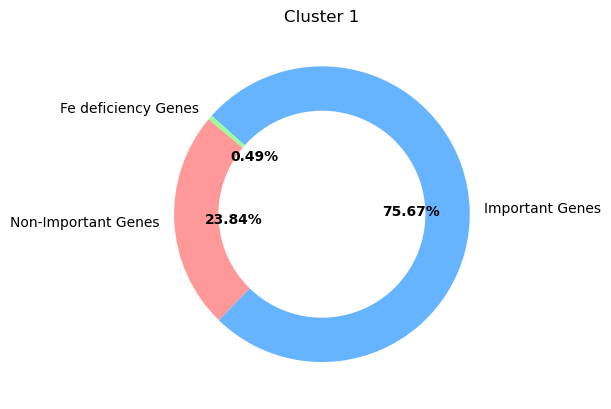


Cluster 2 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At1g09790   
1                   At4g19690   
2                   At3g58060   
3                   At1g77280   
4                   At1g74770   
5                   At3g11750   
6                   At3g21240   
7                   At3g58060   

                                         Description  
0            COBL6, phytochelatin synthetase-related  
1  IRT1 (Fe-REGULATED TRANSPORTER 1); Cd, Fe, Mn,...  
2  cation efflux family protein/metal tolerance p...  
3                      protein kinase family protein  
4                                    unknown protein  
5                dihydroneopterin aldolase, putative  
6  4CL2 (4-coumarate:CoA ligase 2); 4-coumarate-C...  
7  cation efflux family protein/metal tolerance p...  


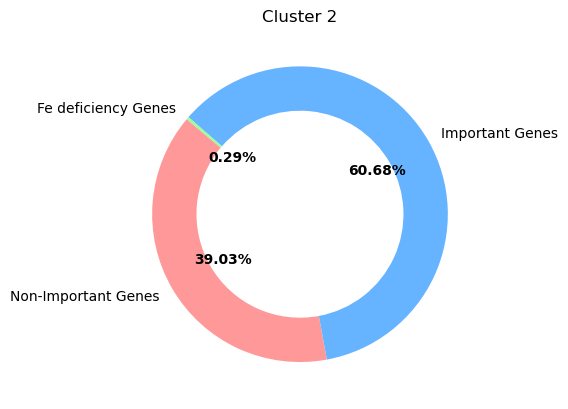


Cluster 3 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At2g20030   
1                   At5g05250   
2                   At1g49820   
3                   At4g19690   
4                   At5g67370   
5                   At5g53450   
6                   At3g47640   
7                   At2g28160   
8                   At4g16370   

                                         Description  
0  zinc finger (C3HC4-type RING finger) family pr...  
1                                    unknown protein  
2                ATMTK, S-methyl-5-thioribose kinase  
3  IRT1 (Fe-REGULATED TRANSPORTER 1); Cd, Fe, Mn,...  
4                                    unknown protein  
5              ORG1 (OBP3-RESPONSIVE GENE 1); kinase  
6       basic helix-loop-helix (bHLH) family protein  
7    ATBHLH029/FIT1/FRU (Fe DEFICIENCY-INDUCED TF 1)  
8  ATOPT3 (OLIGOPEPTIDE TRANSPORTER); oligopeptid...  


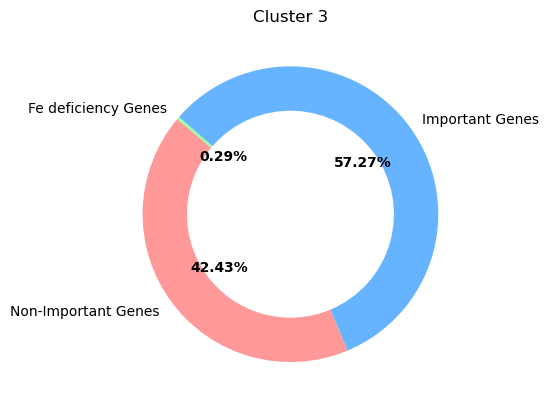


Cluster 4 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At2g45400   

                                         Description  
0  BEN1, dihydroflavonol 4-reductase family/ dihy...  


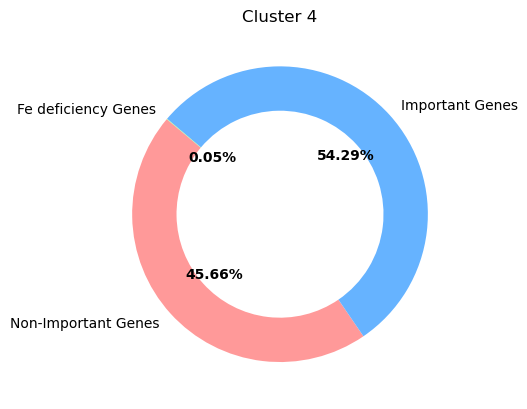


Cluster 5 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At4g19690   
1                   At2g45400   
2                   At1g73120   
3                   At1g49000   
4                   At2g36885   

                                         Description  
0  IRT1 (Fe-REGULATED TRANSPORTER 1); Cd, Fe, Mn,...  
1  BEN1, dihydroflavonol 4-reductase family/ dihy...  
2                                    unknown protein  
3                                    unknown protein  
4                                    unknown protein  


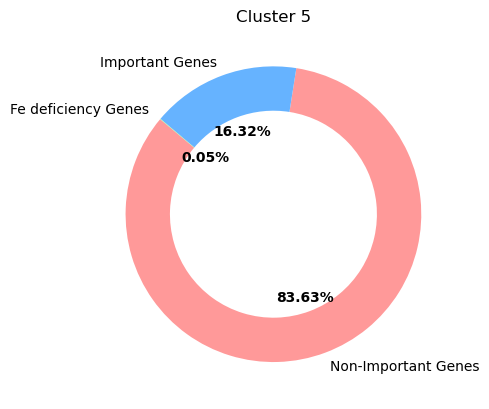


Cluster 6 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At3g21240   
1                   At3g21240   
2                   At4g12910   

                                         Description  
0  4CL2 (4-coumarate:CoA ligase 2); 4-coumarate-C...  
1  4CL2 (4-coumarate:CoA ligase 2); 4-coumarate-C...  
2  SCPL20 (serine carboxypeptidase-like 20); seri...  


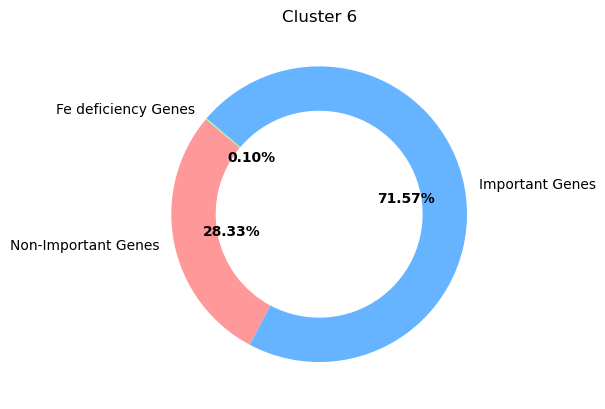


Cluster 7 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At1g21140   
1                   At3g21240   

                                         Description  
0                                  nodulin, putative  
1  4CL2 (4-coumarate:CoA ligase 2); 4-coumarate-C...  


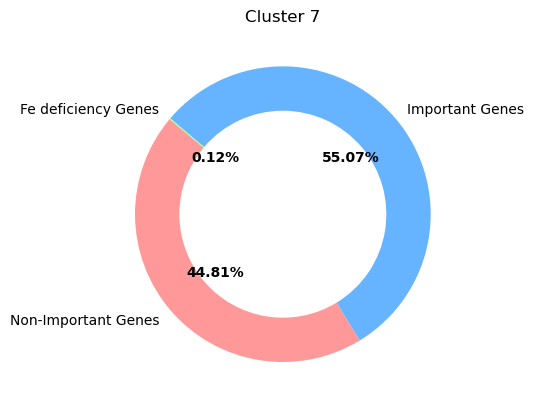


Cluster 8 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At4g12910   
1                   At4g12910   
2                   At5g36890   

                                         Description  
0  SCPL20 (serine carboxypeptidase-like 20); seri...  
1  SCPL20 (serine carboxypeptidase-like 20); seri...  
2  glycosyl hydrolase family 1 protein, hydrolyzi...  


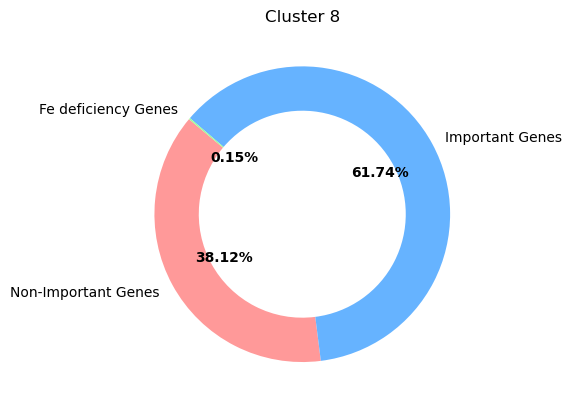


Cluster 9 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At1g09790   
1                   At3g18290   

                                         Description  
0            COBL6, phytochelatin synthetase-related  
1  EMB2454 (EMBRYO DEFECTIVE 2454); protein bindi...  


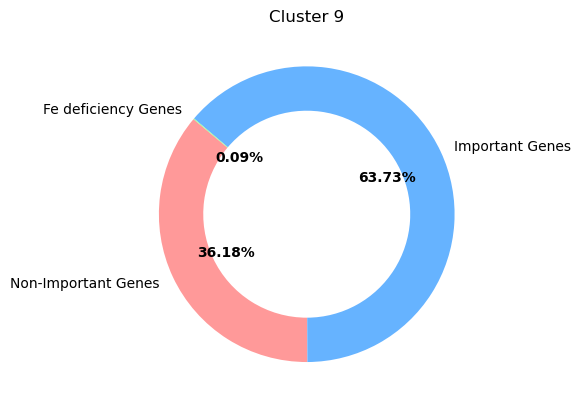


Cluster 10 - Iron Genes (Original Names) and Stories:
  Iron Genes (Original Names)  \
0                   At2g35930   
1                   At2g35930   
2                   At2g35930   
3                   At5g47910   
4                   At4g12910   
5                   At5g03570   
6                   At3g06890   

                                         Description  
0               PUB, U-box domain-containing protein  
1               PUB, U-box domain-containing protein  
2               PUB, U-box domain-containing protein  
3        RBOHD (RESPIRATORY BURST OXIDASE PROTEIN D)  
4  SCPL20 (serine carboxypeptidase-like 20); seri...  
5       ATIREG2, iron-responsive transporter-related  
6                                    unknown protein  


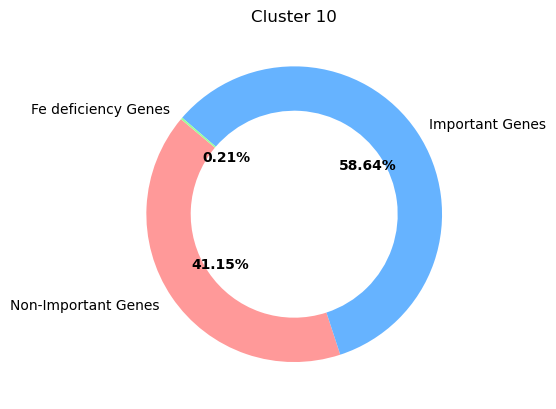


Enrichment DataFrame with p-values:
  Row Cluster Total Genes In Cluster Important Genes In Cluster  \
0           1                   3075                       2342   
1           2                   2775                       1692   
2           3                   3066                       1765   
3           4                   1945                       1057   
4           5                  11011                       1802   
5           6                   2898                       2077   
6           7                   1687                        931   
7           8                   2049                       1268   
8           9                   2189                       1397   
9          10                   3380                       1989   

   Percentage of Important Genes Iron Genes In Cluster  \
0                      76.162602                    15   
1                      60.972973                     8   
2                      57.566862                   

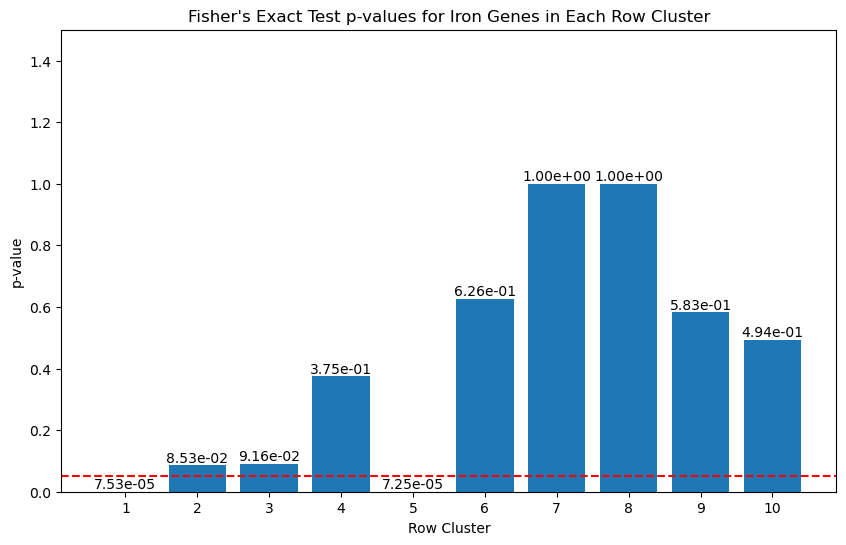

In [19]:
# Load the gene mapping
# 'GeneNames.txt' has 3 columns:
# 1)tomato gene names in FPKM_tomato
# 2)gene names in "annotation Solyc_ITAG4_0.xlsx"
# 3)important gene names in column l of "annotation Solyc_ITAG4_0.xlsx"

file_path = 'GeneNames.txt'
mapping_df = pd.read_csv(file_path, sep='\t', header=None, names=['Column1', 'GeneID', 'ImportantName'], skiprows=1)
gene_mapping = mapping_df.dropna(subset=['ImportantName']).set_index('GeneID')['ImportantName'].to_dict()

# Print the number of unique values (ImportantName) in gene_mapping
unique_important_names = len(set(gene_mapping.values()))
print(f"Number of ImportantName values in gene_mapping: {len(gene_mapping)}")
print(f"Number of UNIQUE ImportantName values in gene_mapping: {unique_important_names}")

# Load the iron genes file with a distinct column name
# First and second Column of 'iron_genes1.txt' contain "Fe deficiency gene names" and "descriptions", respectively.
# I extracted them from "A hitchhiker’s guide to the Arabidopsis ferrome" paper
iron_genes_path = 'iron_genes1.txt'
iron_genes_df = pd.read_csv(iron_genes_path, sep='\t', header=None, names=['IronImportantName', 'Description'])

# Drop NaN values and convert to list
iron_genes = iron_genes_df['IronImportantName'].dropna().tolist()
iron_genes_lower = [gene.lower() for gene in iron_genes]

# For debugging
print("Number of Iron genes is ", len(iron_genes))
# Filter gene_mapping to only include genes that are in the iron_genes list (case-insensitive)
filtered_gene_mapping = {k: v for k, v in gene_mapping.items() if v.lower() in iron_genes_lower}
# Debugging: Print the total counts of important genes before and after filtering
total_important_genes_before = len(gene_mapping)
total_important_genes_after = len(filtered_gene_mapping)
print(f"Total Important Genes Before Filtering: {total_important_genes_before}")
print(f"Total Important Genes After Filtering: {total_important_genes_after}")



# Create a dictionary for quick lookup of original iron gene names and their stories
iron_genes_dict = {row['IronImportantName'].lower(): row['IronImportantName'] for idx, row in iron_genes_df.iterrows()}
iron_genes_Description_dict = {row['IronImportantName'].lower(): row['Description'] for idx, row in iron_genes_df.iterrows()}

# Initialize a DataFrame to store the results
enrichment_df = pd.DataFrame(columns=[
    'Row Cluster', 'Total Genes In Cluster', 'Important Genes In Cluster', 'Percentage of Important Genes',
    'Iron Genes In Cluster', 'Percentage of Iron Genes', 'Non-Iron Genes In Cluster',
    'Iron Genes Outside Cluster', 'Non-Iron Genes Outside Cluster', 'p-value'
])

for i, row_cluster_df in enumerate(row_clusters):
    genes_in_cluster = row_cluster_df.index.tolist()
    genes_outside_cluster = [gene for gene in gene_names if gene not in genes_in_cluster]

    total_genes_in_cluster = len(genes_in_cluster)
    important_genes_in_cluster = sum([1 for gene in genes_in_cluster if gene[:14] in gene_mapping])
    iron_genes_in_cluster = sum([1 for gene in genes_in_cluster if gene_mapping.get(gene[:14], "").lower() in iron_genes_lower])
    non_iron_genes_in_cluster = total_genes_in_cluster - iron_genes_in_cluster
    iron_genes_outside_cluster = sum([1 for gene in genes_outside_cluster if gene_mapping.get(gene[:14], "").lower() in iron_genes_lower])
    non_iron_genes_outside_cluster = len(genes_outside_cluster) - iron_genes_outside_cluster

    # Calculate percentages
    percentage_important_genes = (important_genes_in_cluster / total_genes_in_cluster) * 100
    percentage_iron_genes = (iron_genes_in_cluster / total_genes_in_cluster) * 100

    contingency_table = [
        [iron_genes_in_cluster, iron_genes_outside_cluster],
        [non_iron_genes_in_cluster, non_iron_genes_outside_cluster]
    ]
    _, p_value = fisher_exact(contingency_table)

    enrichment_df = pd.concat([enrichment_df, pd.DataFrame({
        'Row Cluster': [i + 1],
        'Total Genes In Cluster': [total_genes_in_cluster],
        'Important Genes In Cluster': [important_genes_in_cluster],
        'Percentage of Important Genes': [percentage_important_genes],
        'Iron Genes In Cluster': [iron_genes_in_cluster],
        'Percentage of Iron Genes': [percentage_iron_genes],
        'Non-Iron Genes In Cluster': [non_iron_genes_in_cluster],
        'Iron Genes Outside Cluster': [iron_genes_outside_cluster],
        'Non-Iron Genes Outside Cluster': [non_iron_genes_outside_cluster],
        'p-value': [p_value]
    })], ignore_index=True)

    print(f"\nCluster {i + 1} - Iron Genes (Original Names) and Stories:")
    iron_genes_df_original = pd.DataFrame({
        'Iron Genes (Original Names)': [iron_genes_dict.get(gene_mapping.get(gene[:14], "").lower(), gene) for gene in genes_in_cluster if gene_mapping.get(gene[:14], "").lower() in iron_genes_lower],
        'Description': [iron_genes_Description_dict.get(gene_mapping.get(gene[:14], "").lower(), "") for gene in genes_in_cluster if gene_mapping.get(gene[:14], "").lower() in iron_genes_lower]
    })
    print(iron_genes_df_original)


    # Create a pie chart for the percentages of genes
    sizes = [
        100 - percentage_important_genes,
        percentage_important_genes - percentage_iron_genes,
        percentage_iron_genes
    ]
    labels = ['Non-Important Genes', 'Important Genes', 'Fe deficiency Genes']
    colors = ['#ff9999', '#66b3ff', '#99ff99']

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(
        sizes, labels=labels, colors=colors,
        autopct=lambda p: '{:.2f}%'.format(p),
        startangle=140,
        wedgeprops={'width': 0.3}
    )
    
    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(f'Cluster {i + 1}')
    plt.show()

# Print the enrichment DataFrame with p-values
print("\nEnrichment DataFrame with p-values:")
print(enrichment_df)
#/////////////////////////////////////////////////////////////////

# Plot the p-values for each cluster
plt.figure(figsize=(10, 6))
bars = plt.bar(enrichment_df['Row Cluster'], enrichment_df['p-value'])
plt.xlabel('Row Cluster')
plt.ylabel('p-value')
plt.title('Fisher\'s Exact Test p-values for Iron Genes in Each Row Cluster')

# Ensure the x-axis labels are integers
plt.xticks(ticks=np.arange(1, row_k + 1), labels=np.arange(1, row_k + 1))

# Set y-axis range to zoom in on small p-values (from 0 to slightly above the highest p-value)
plt.ylim(0, min(enrichment_df['p-value'].max() + 0.5, 2))  # Adjust the y-axis limit

# Add significance level line (p-value = 0.05)
plt.axhline(y=0.05, color='r', linestyle='--')

# Add exact p-values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2e}', ha='center', va='bottom')
plt.show()

#### <font color=red> New: Hierarchical Column-Based Clustering for each of the row-based clusters using 1) <font color=green> All genes </font> 2) <font color=green> Only Fe deficiency genes </font> in that cluster
- The similarity measure used: Euclidean distance
- The linkage method used: Ward
- 💀💀 They do not specify a fixed number of clusters.

#### 1) using <font color=green> All genes </font> in each cluster </font>


Row Cluster 1 contains 3075 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

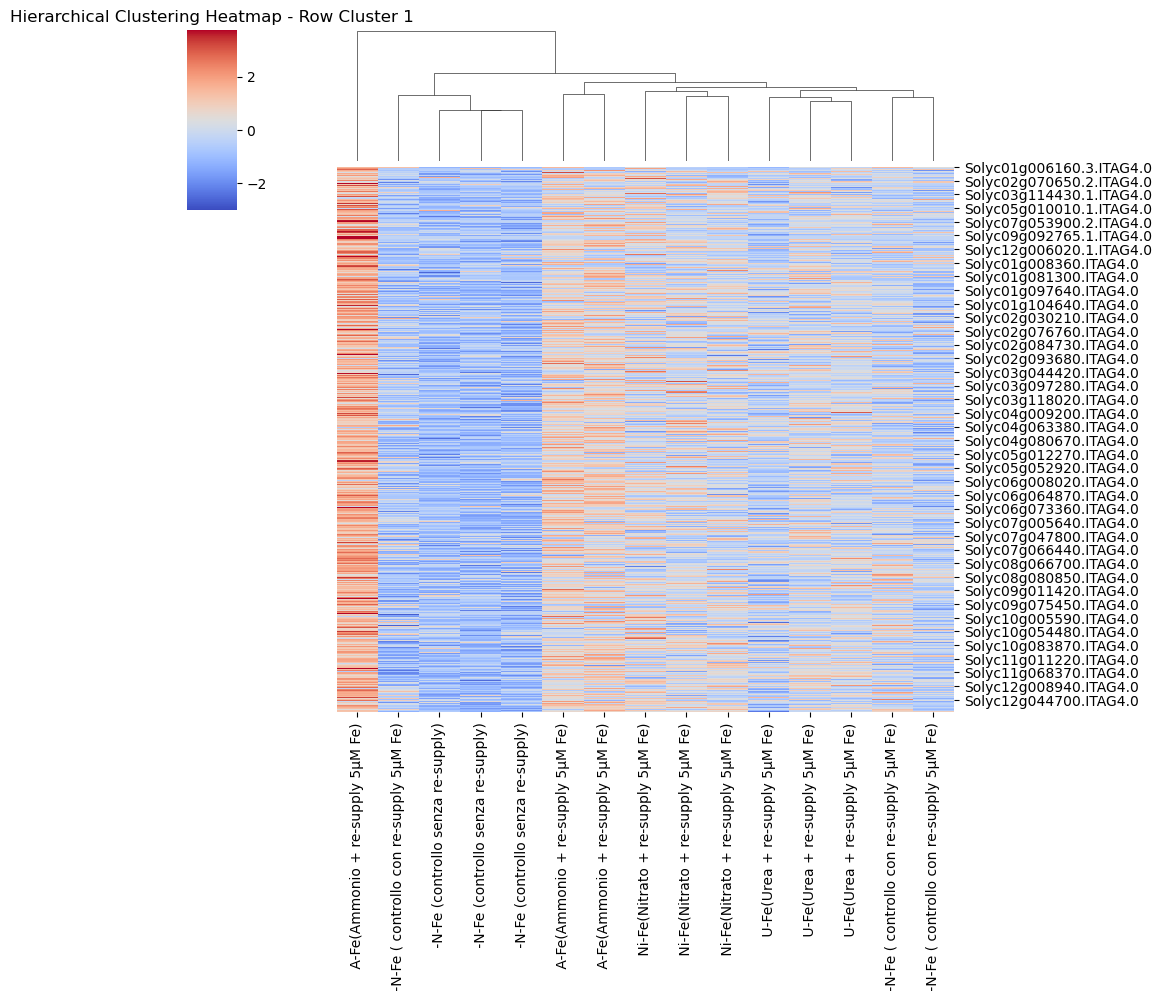

Row Cluster 2 contains 2775 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

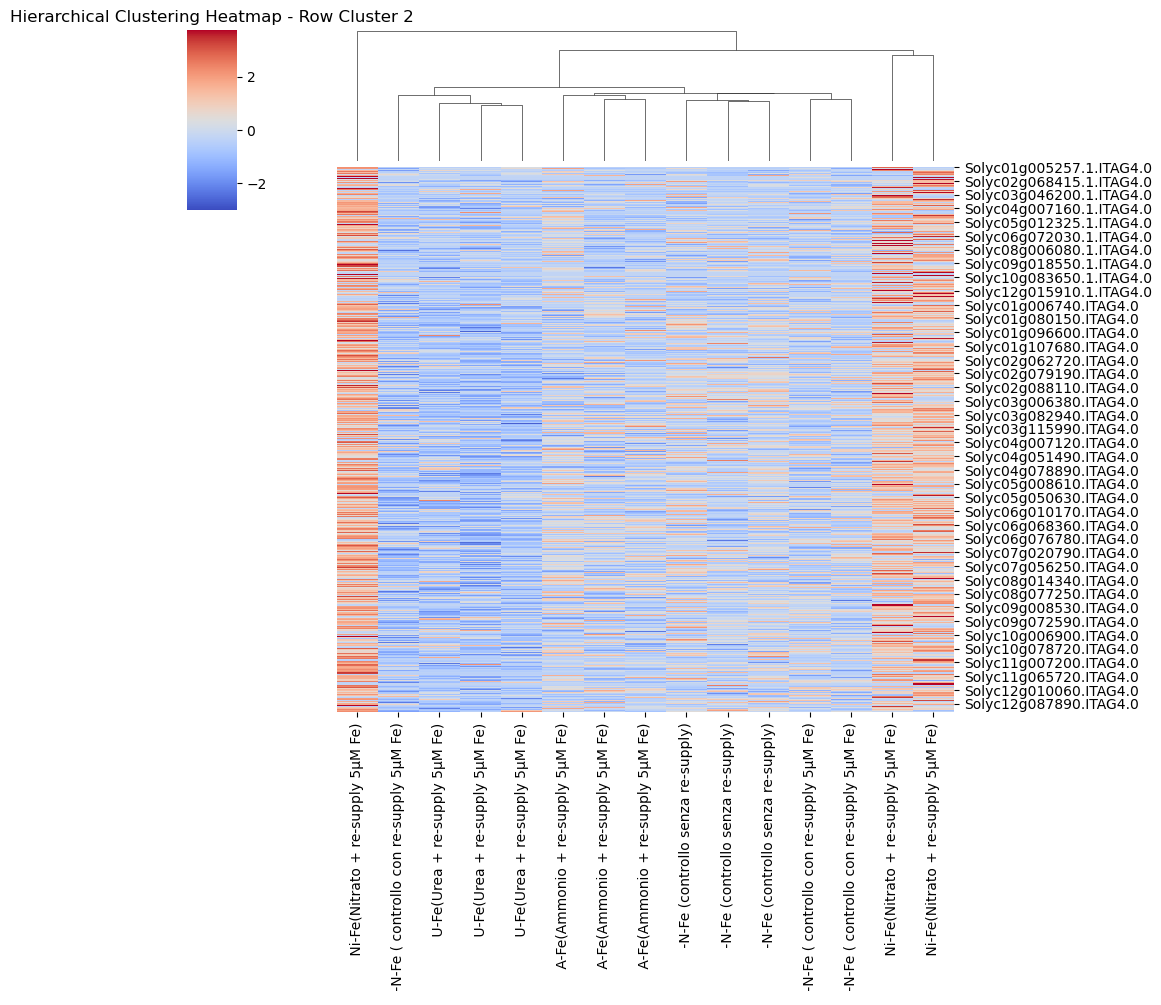

Row Cluster 3 contains 3066 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

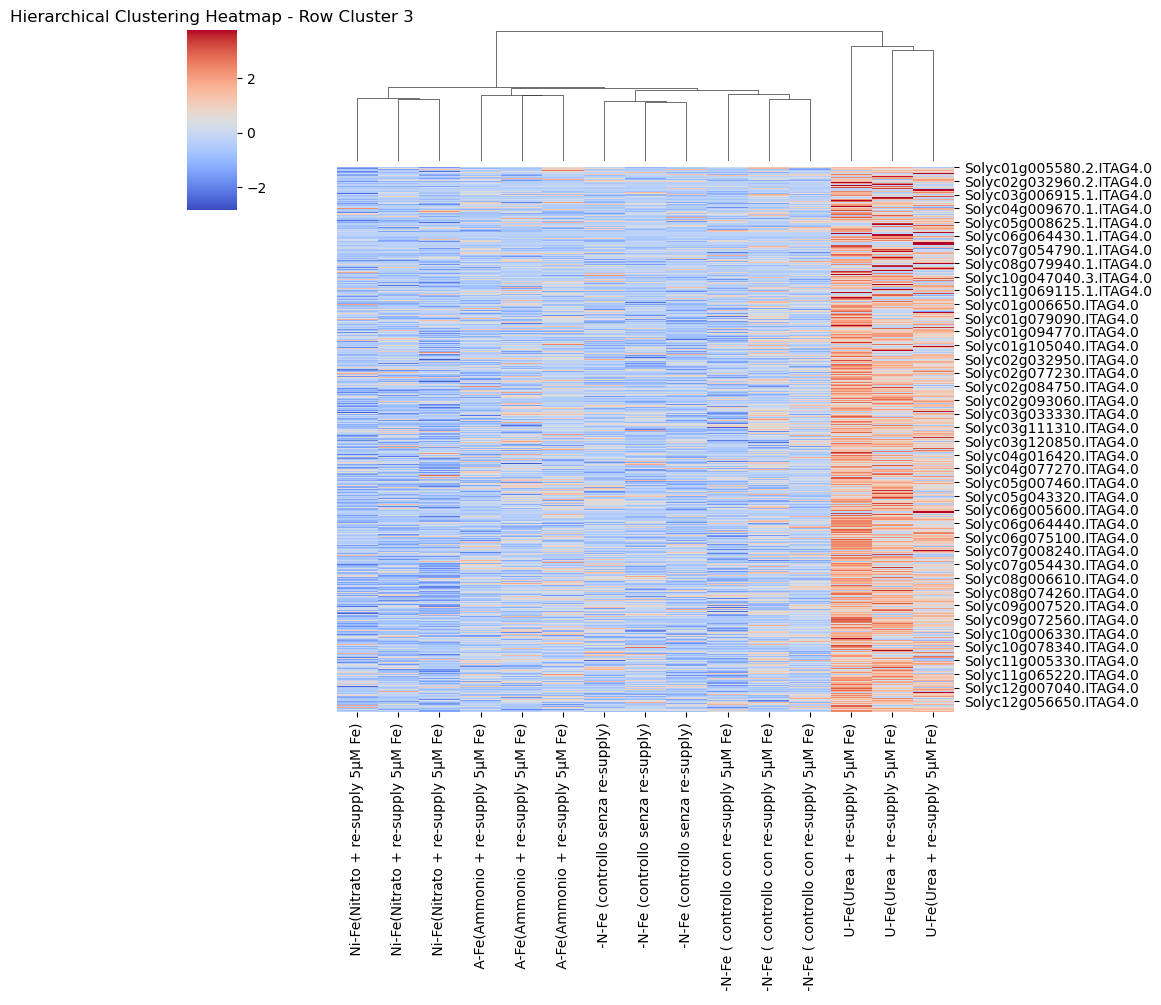

Row Cluster 4 contains 1945 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

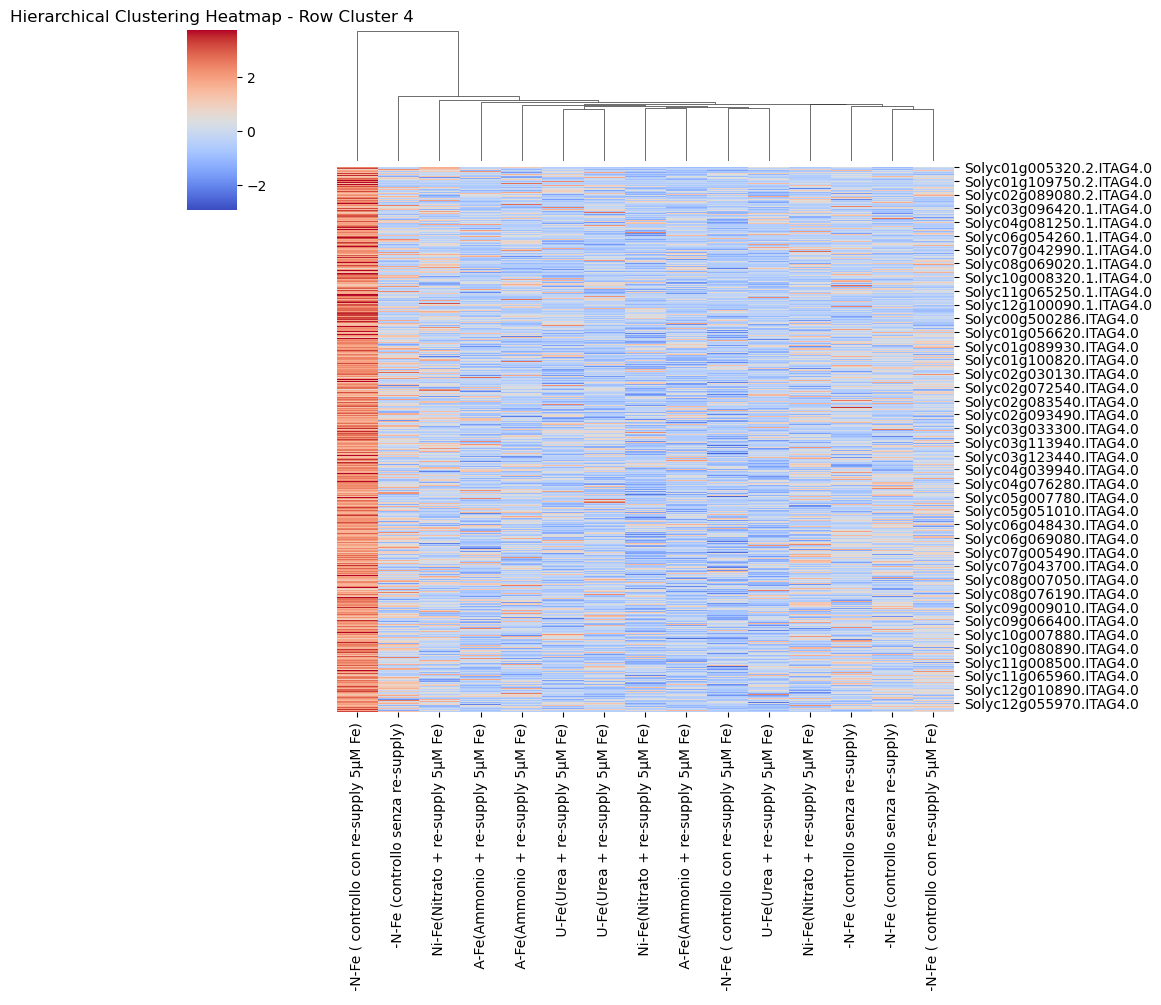

Row Cluster 5 contains 11011 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

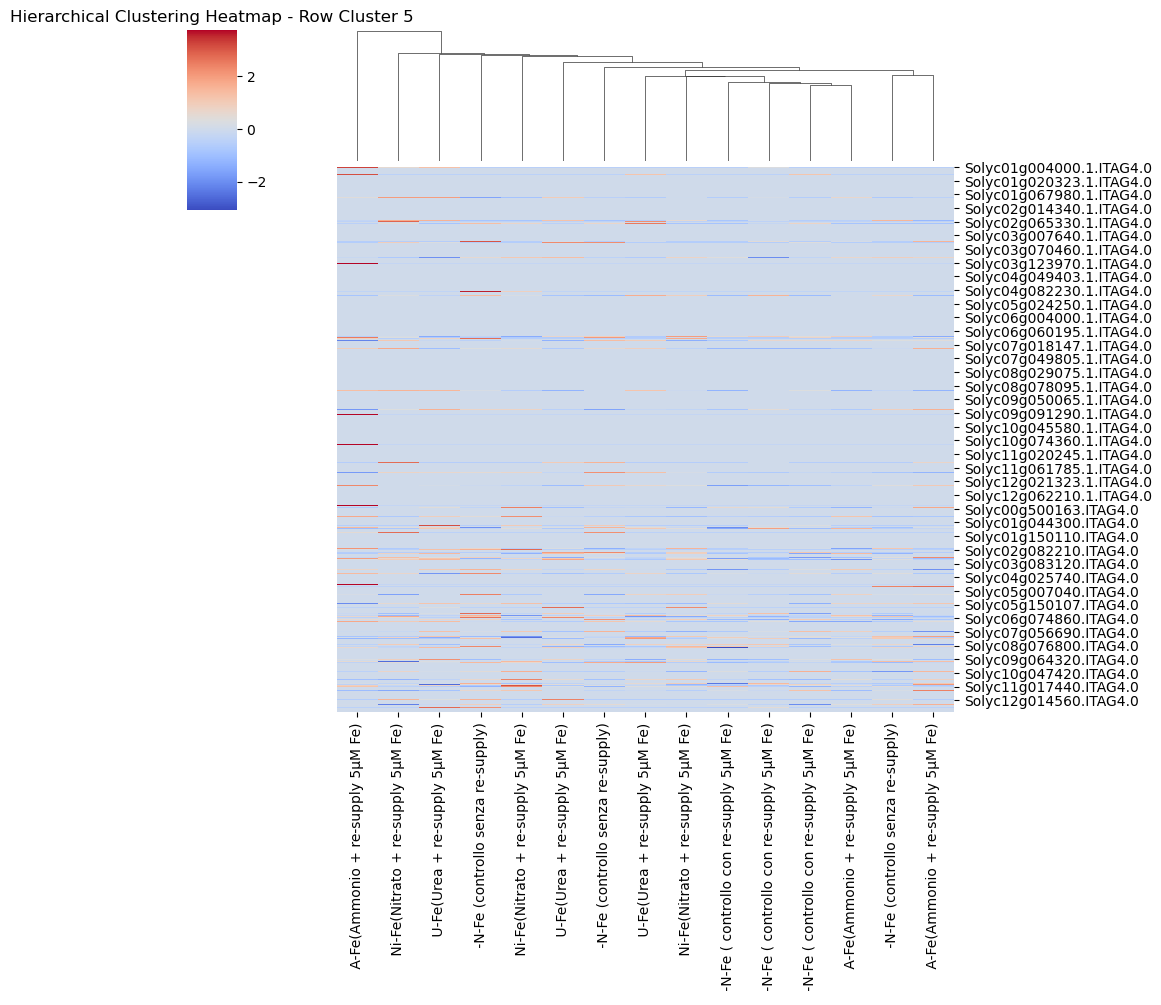

Row Cluster 6 contains 2898 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

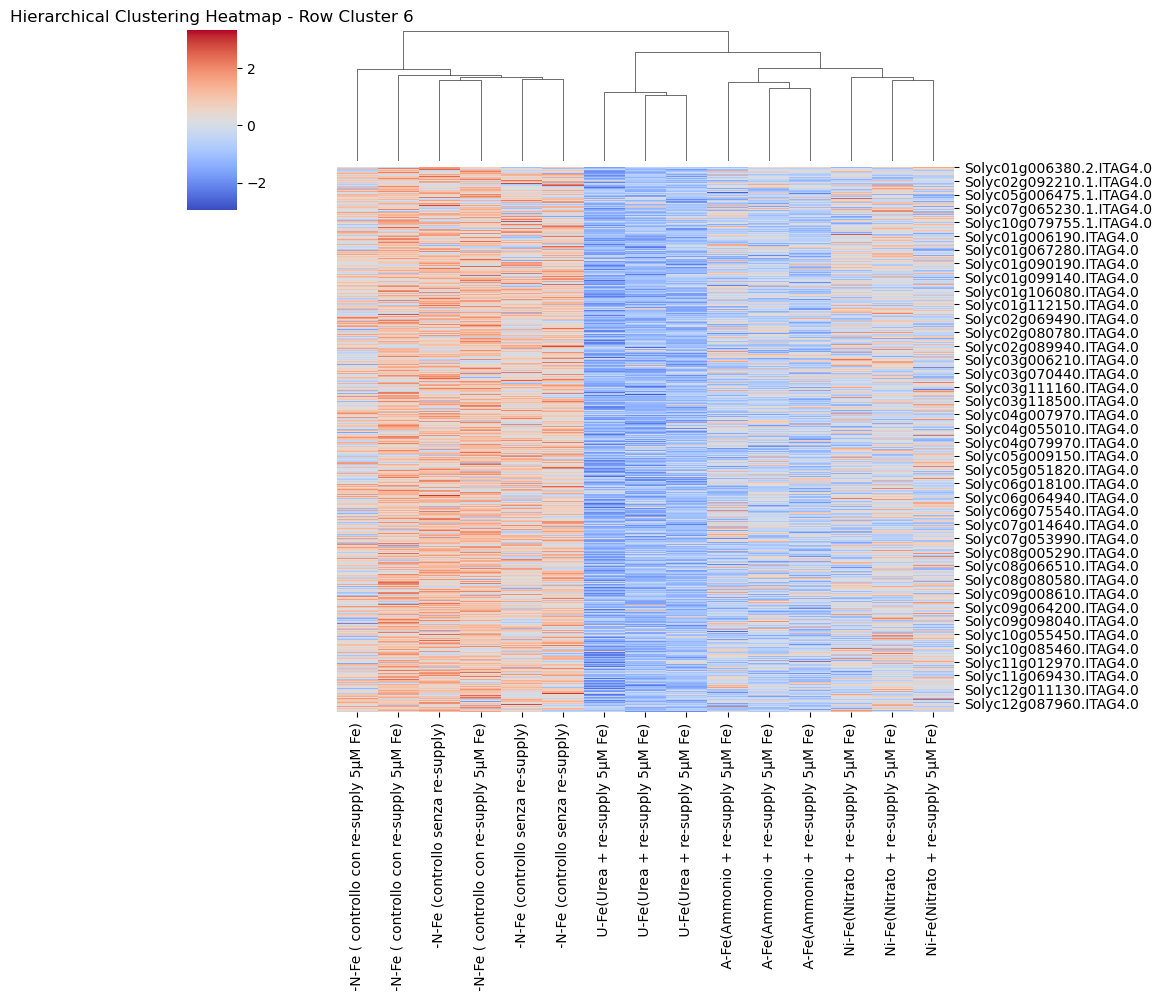

Row Cluster 7 contains 1687 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

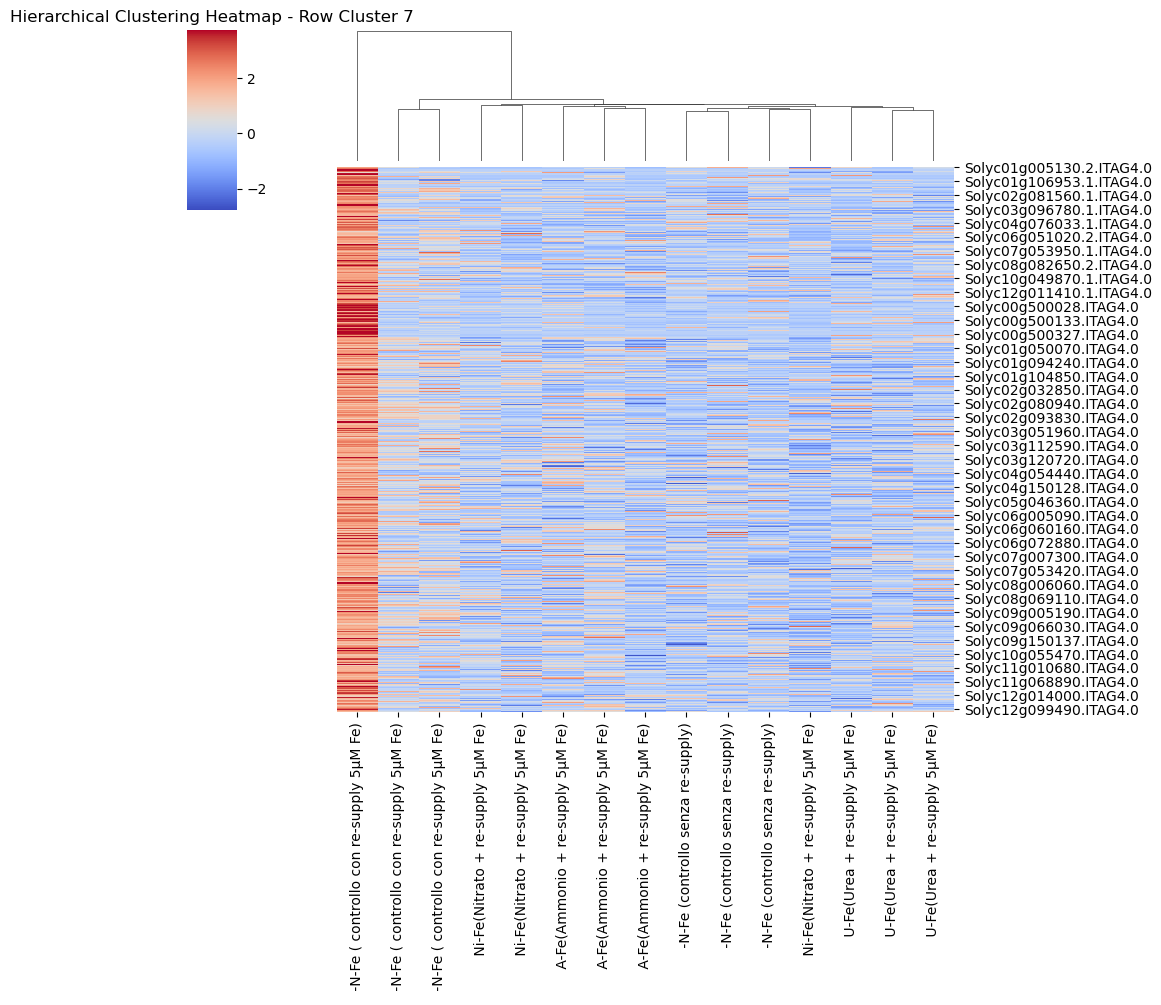

Row Cluster 8 contains 2049 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

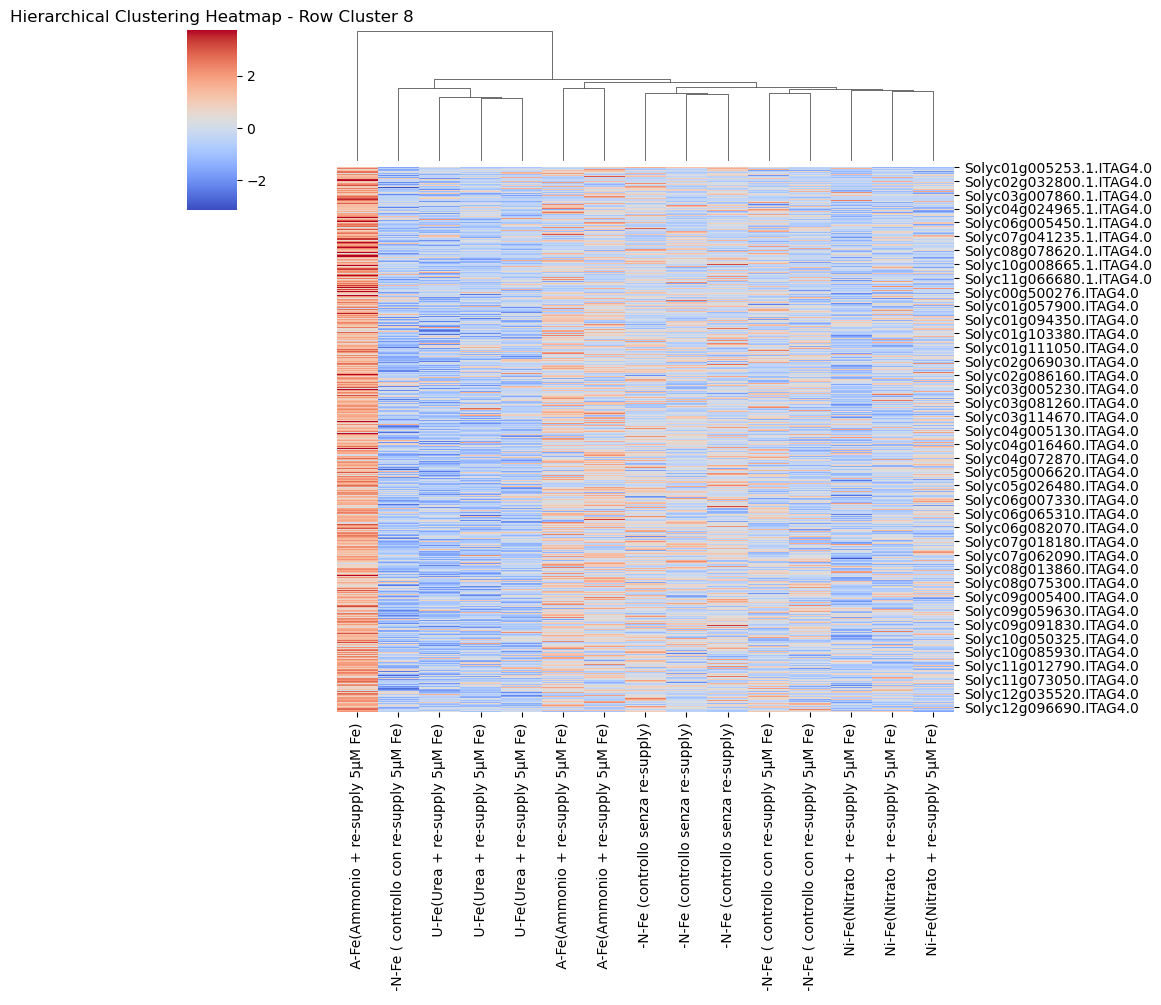

Row Cluster 9 contains 2189 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

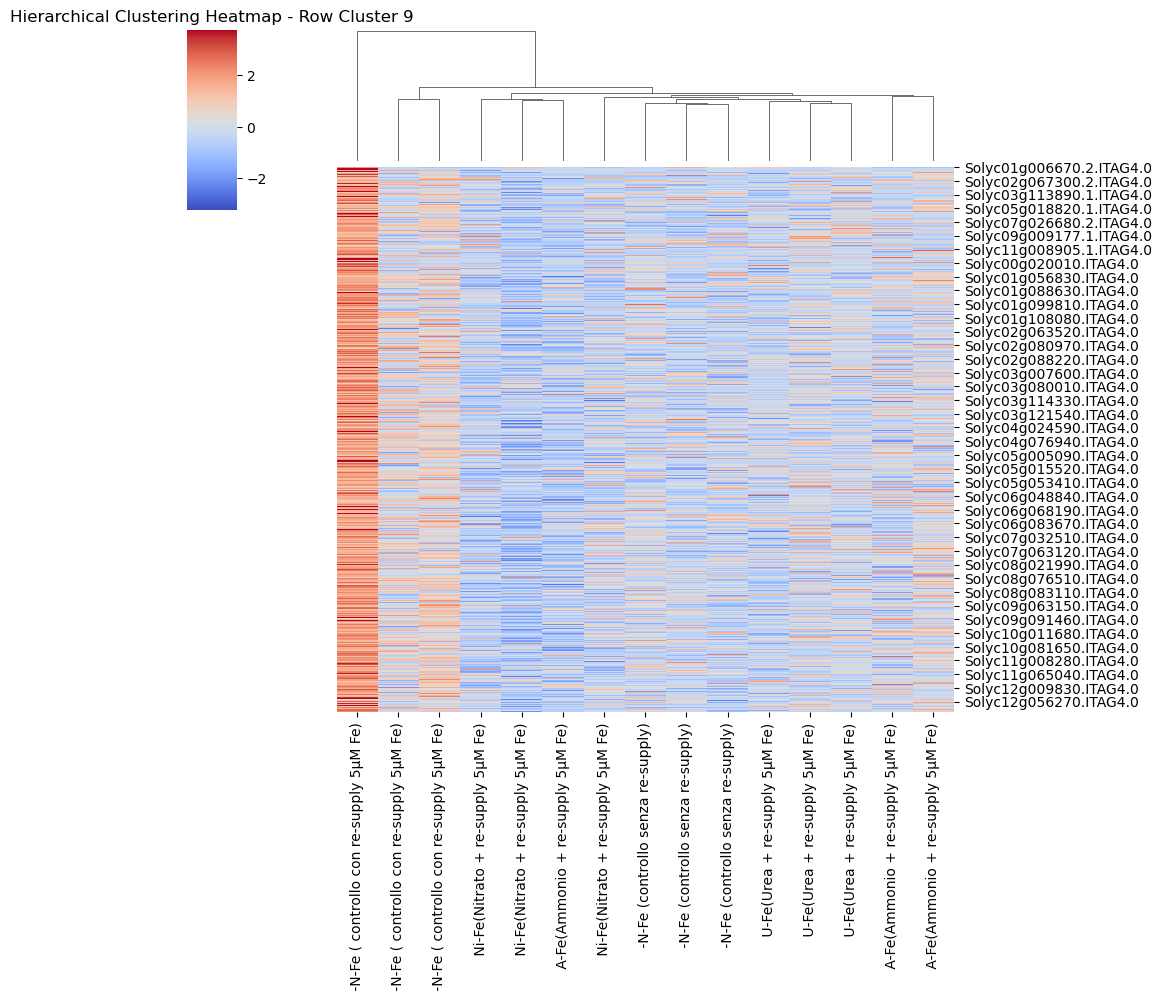

Row Cluster 10 contains 3380 genes.


C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

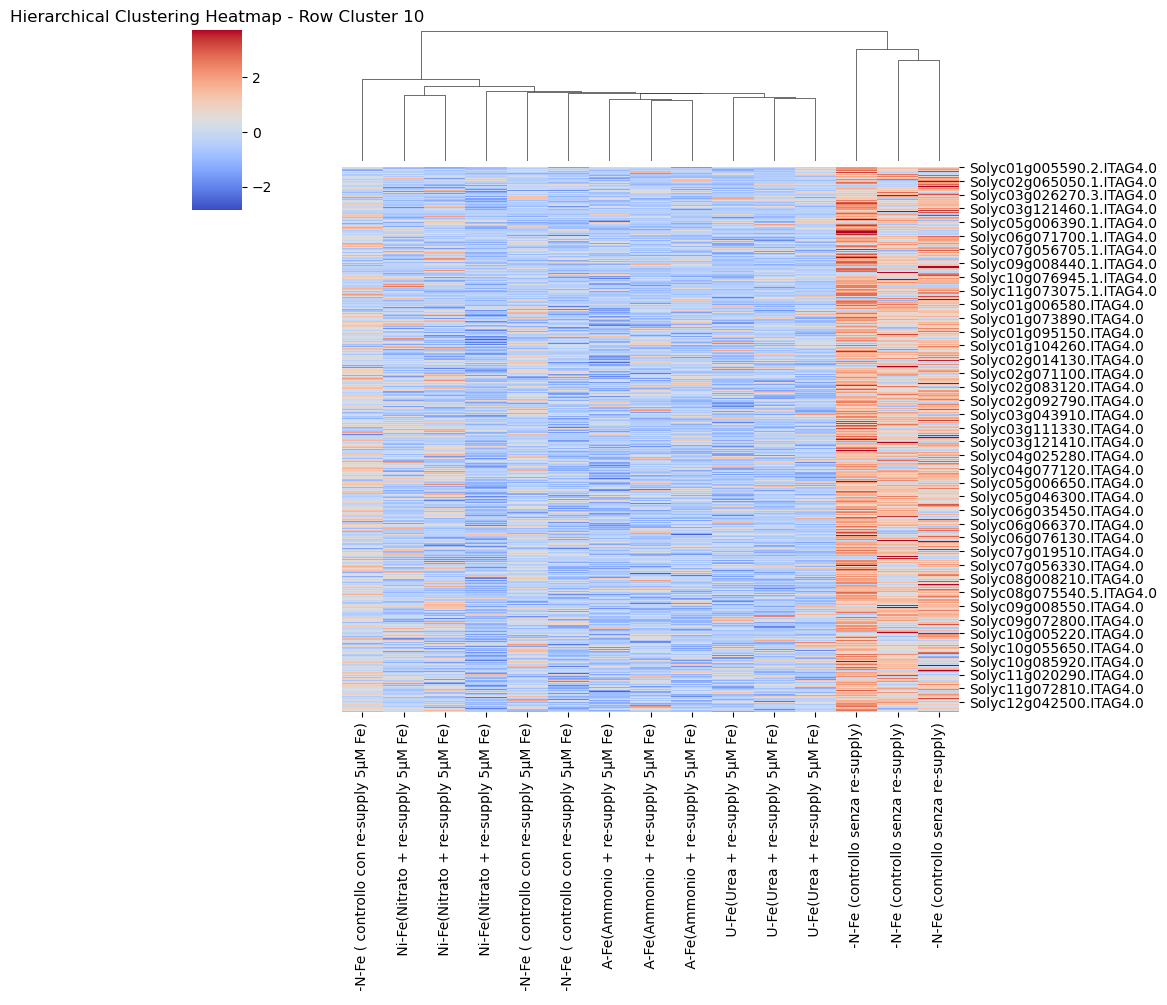

In [20]:
# Perform hierarchical clustering on rows and columns for each row cluster
for i, row_cluster_df in enumerate(row_clusters):
    
    # Calculate the number of genes in the current cluster
    num_genes = row_cluster_df.shape[0]
    print(f'Row Cluster {i + 1} contains {num_genes} genes.')
    
    # Perform hierarchical clustering on columns
    col_linkage = linkage(row_cluster_df.T, method='ward')

    # Create a clustered heatmap
    plt.figure(figsize=(12, 10))
    sns.clustermap(row_cluster_df, col_cluster=True, row_cluster=False, cmap='coolwarm')
    plt.title(f'Hierarchical Clustering Heatmap - Row Cluster {i + 1}')
    plt.show()


#### 2) using <font color=green> Only Fe deficiency genes </font> in each cluster </font>


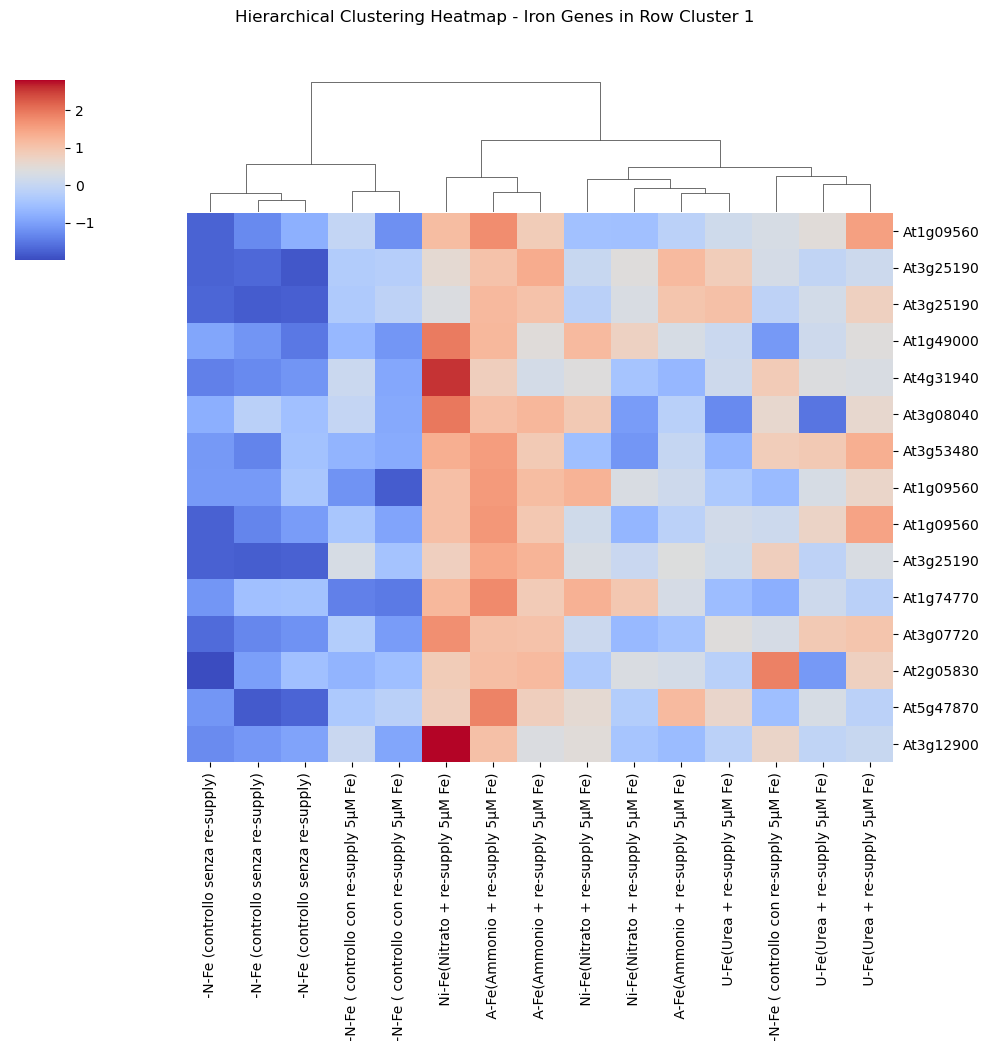

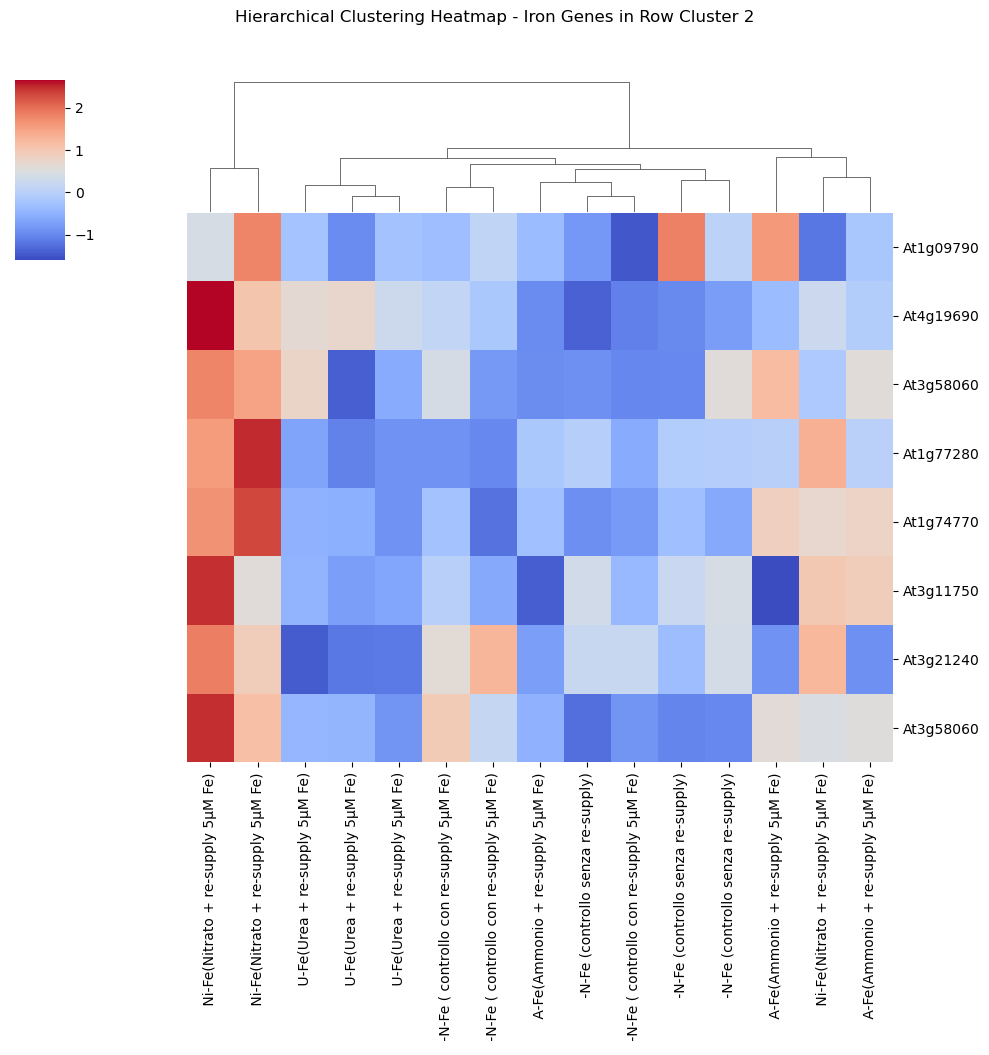

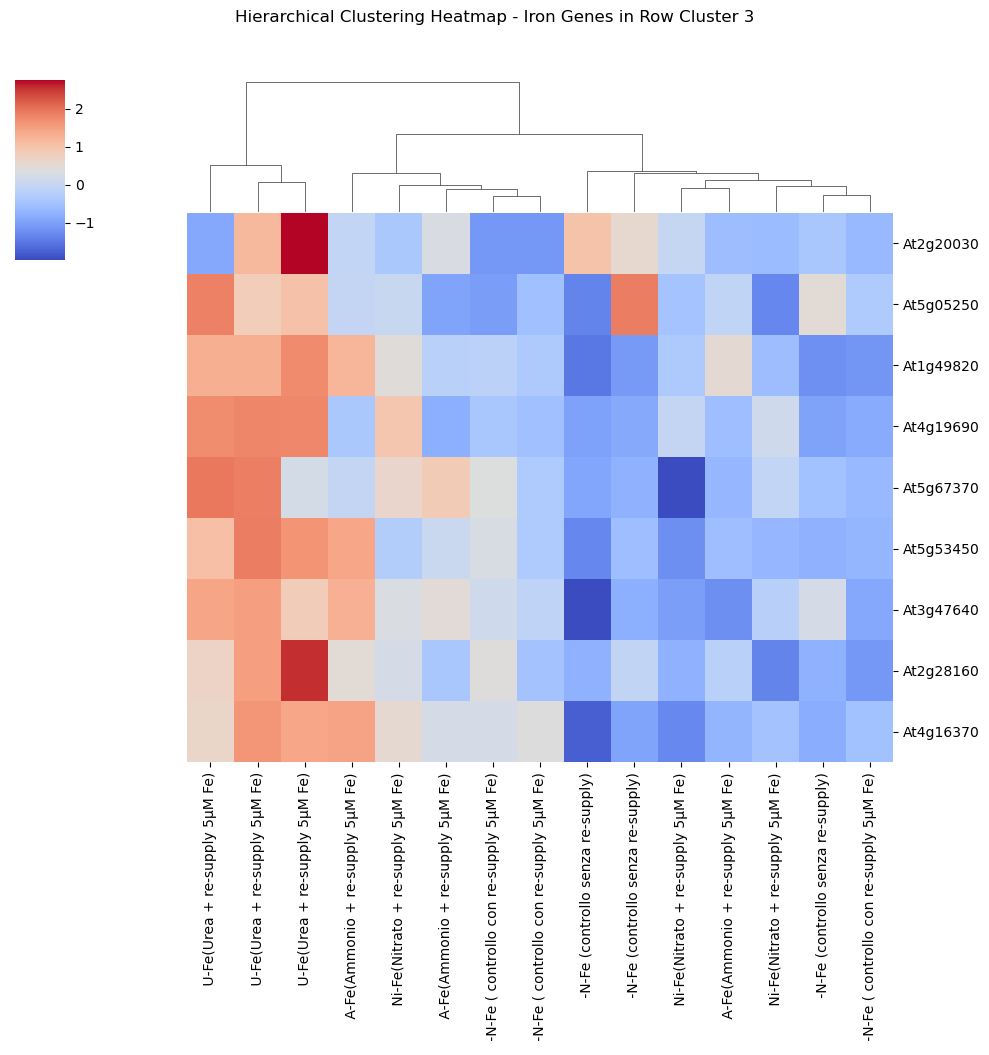

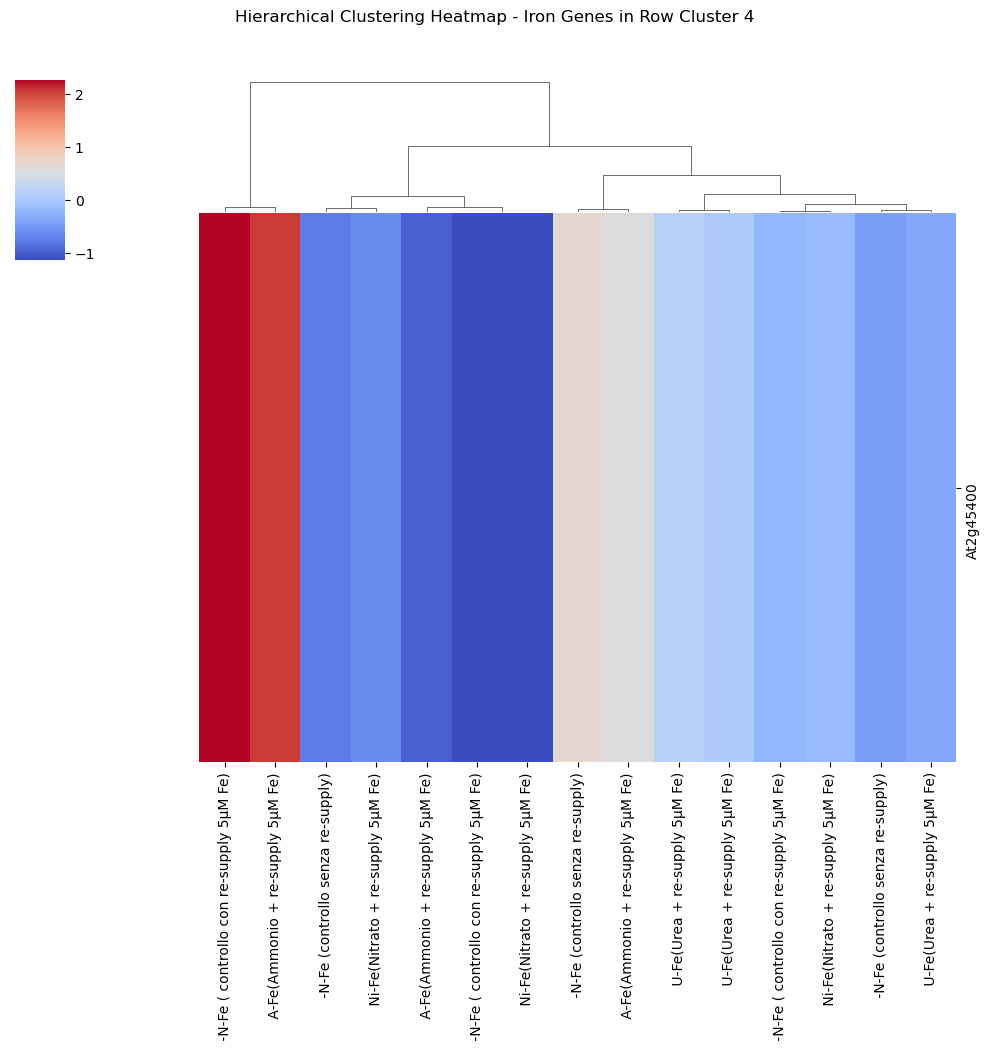

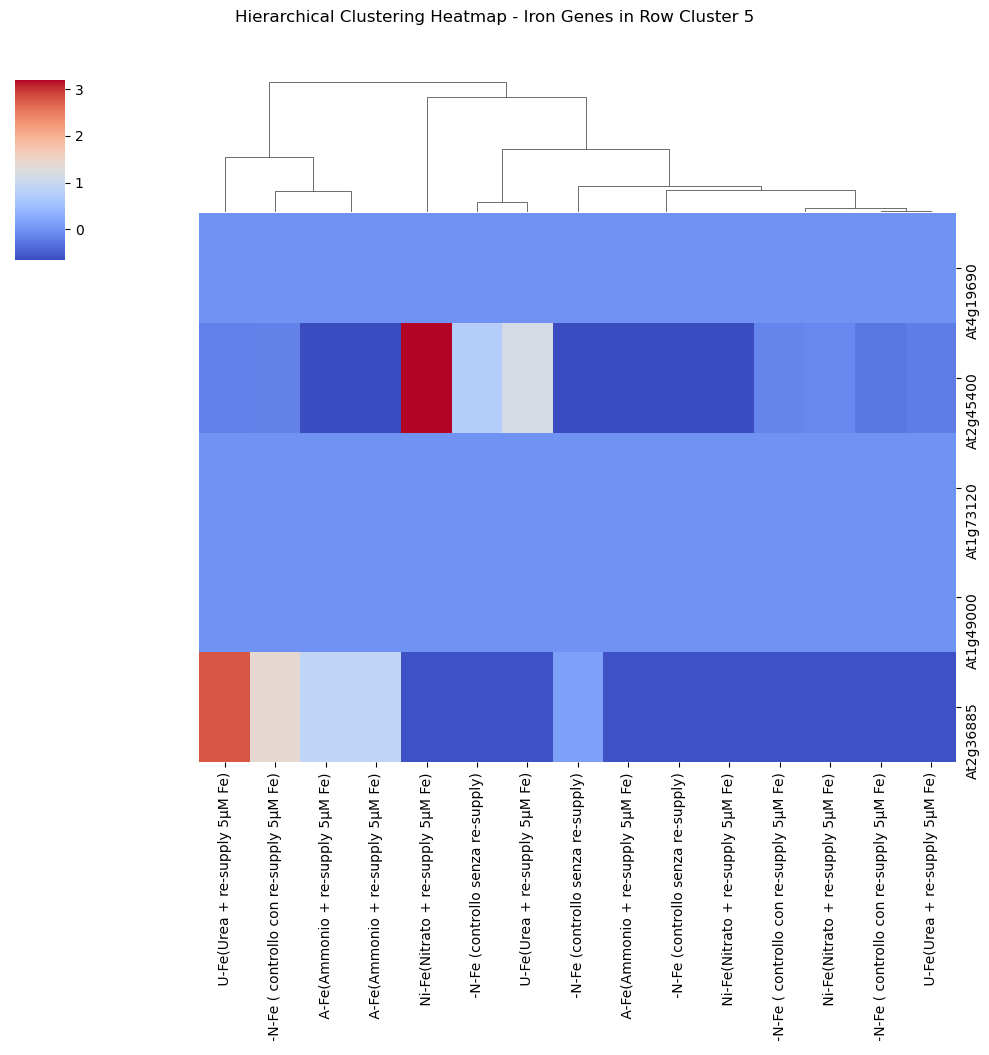

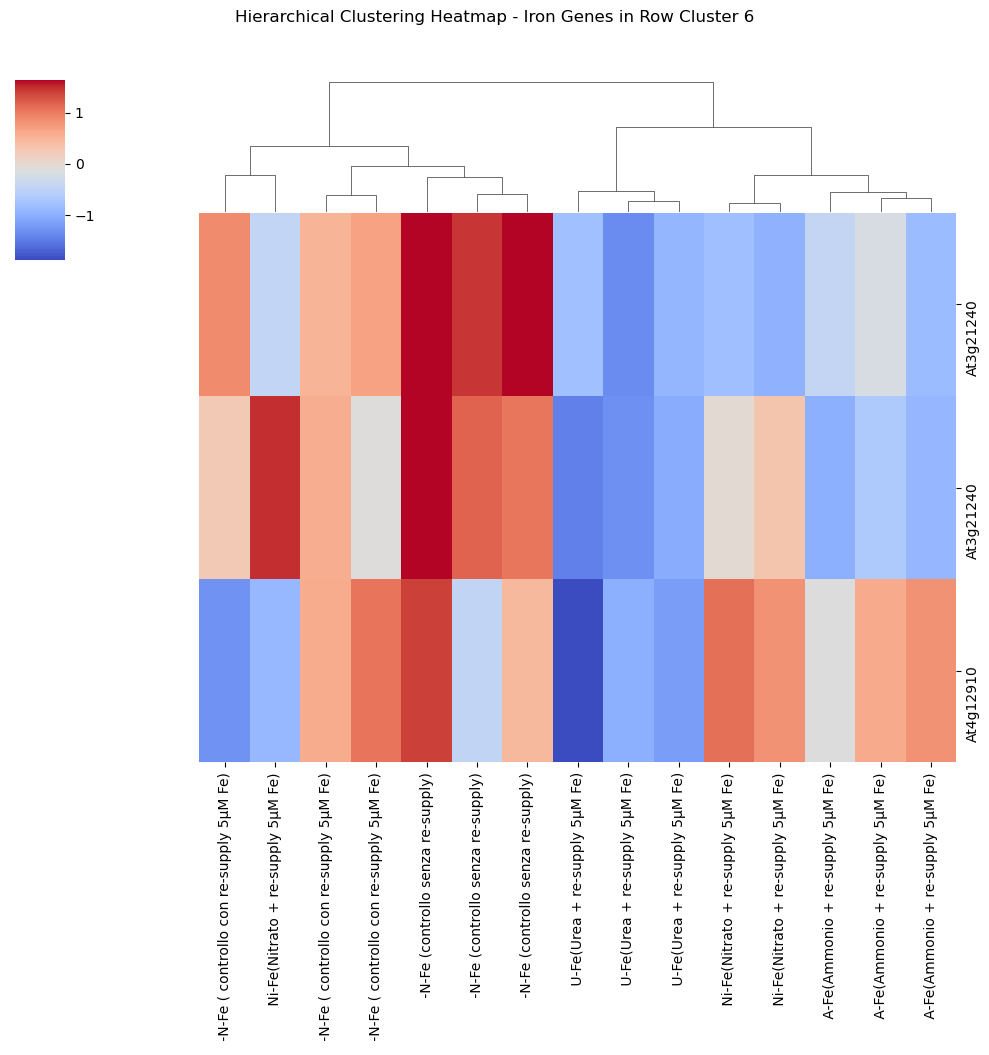

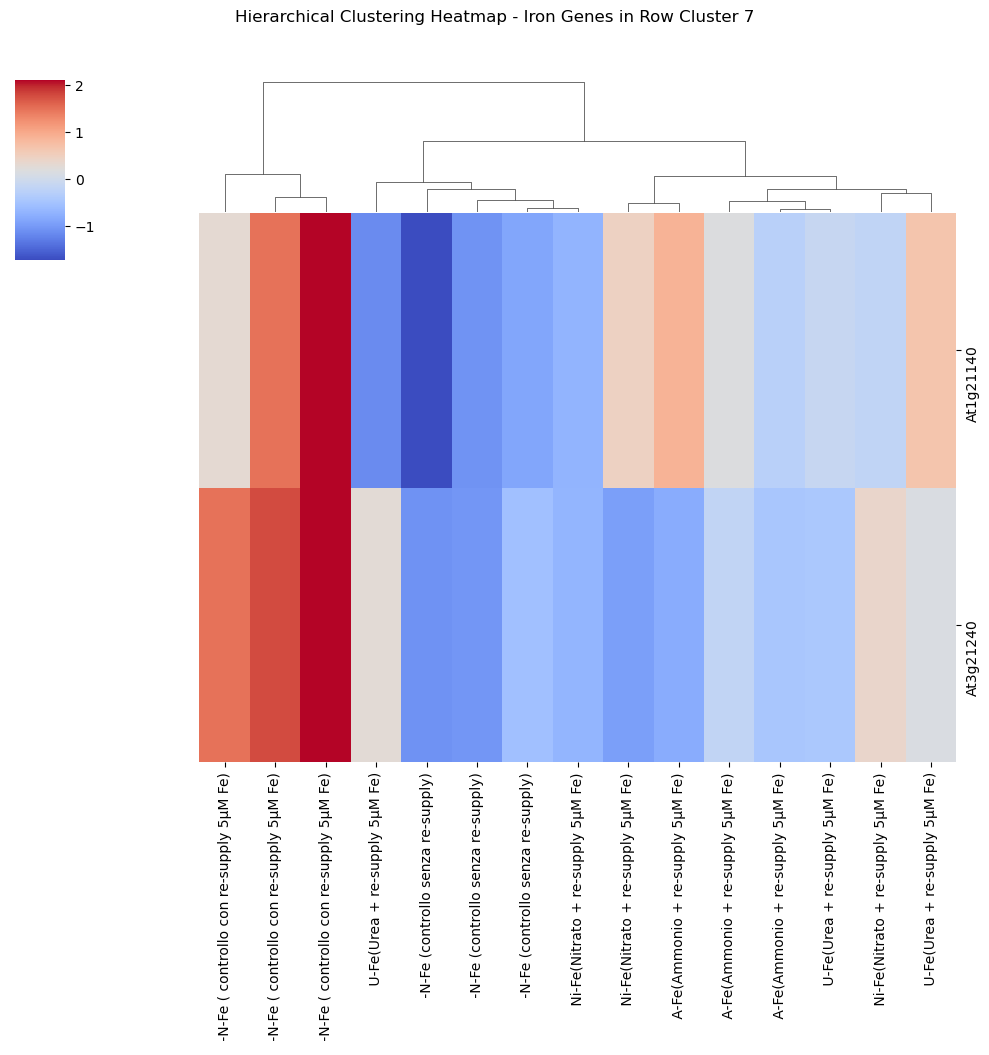

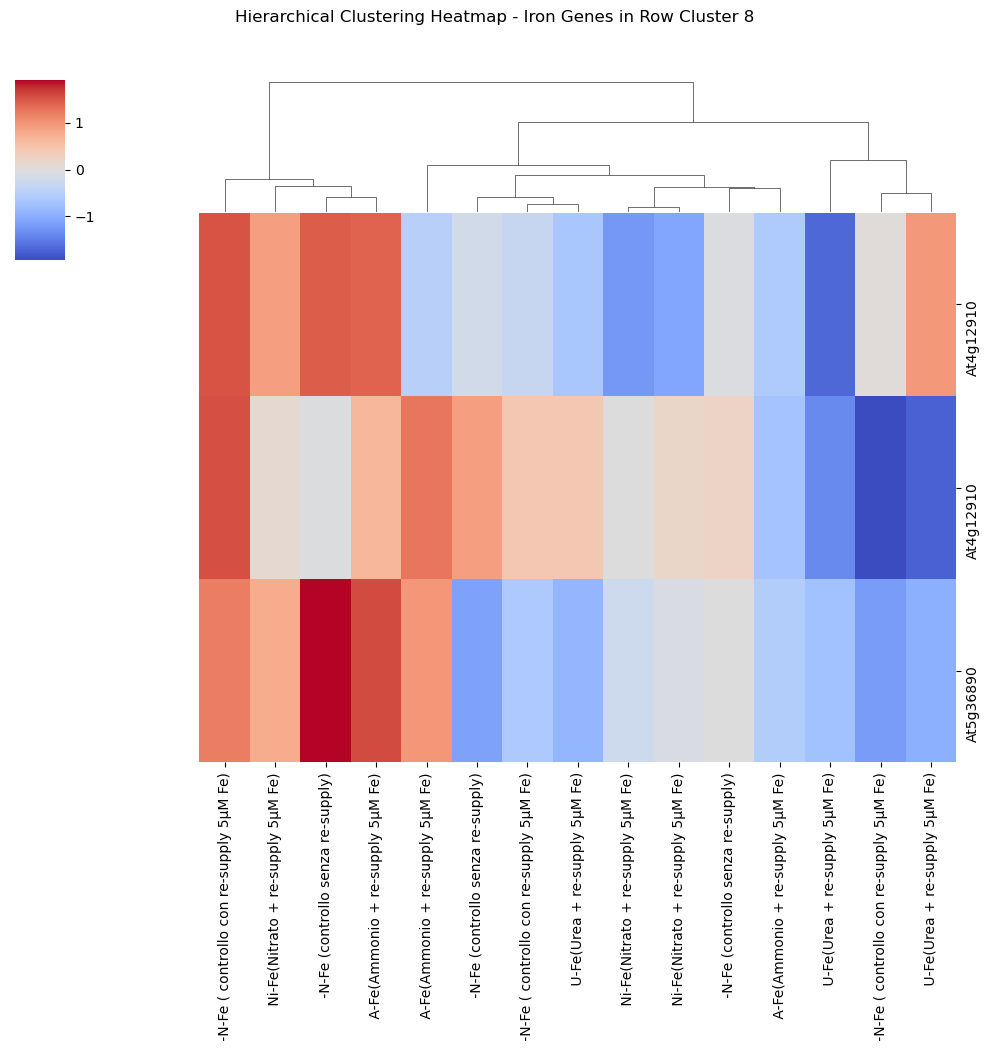

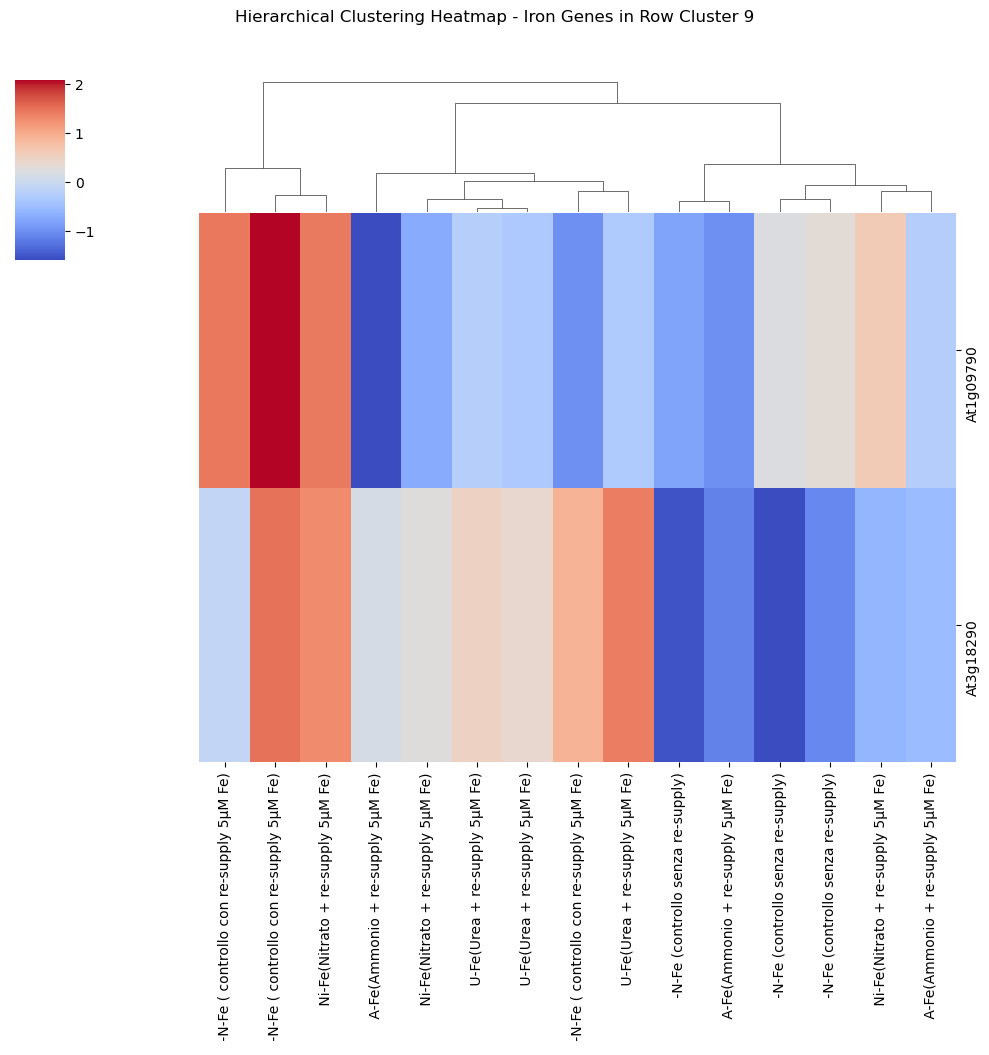

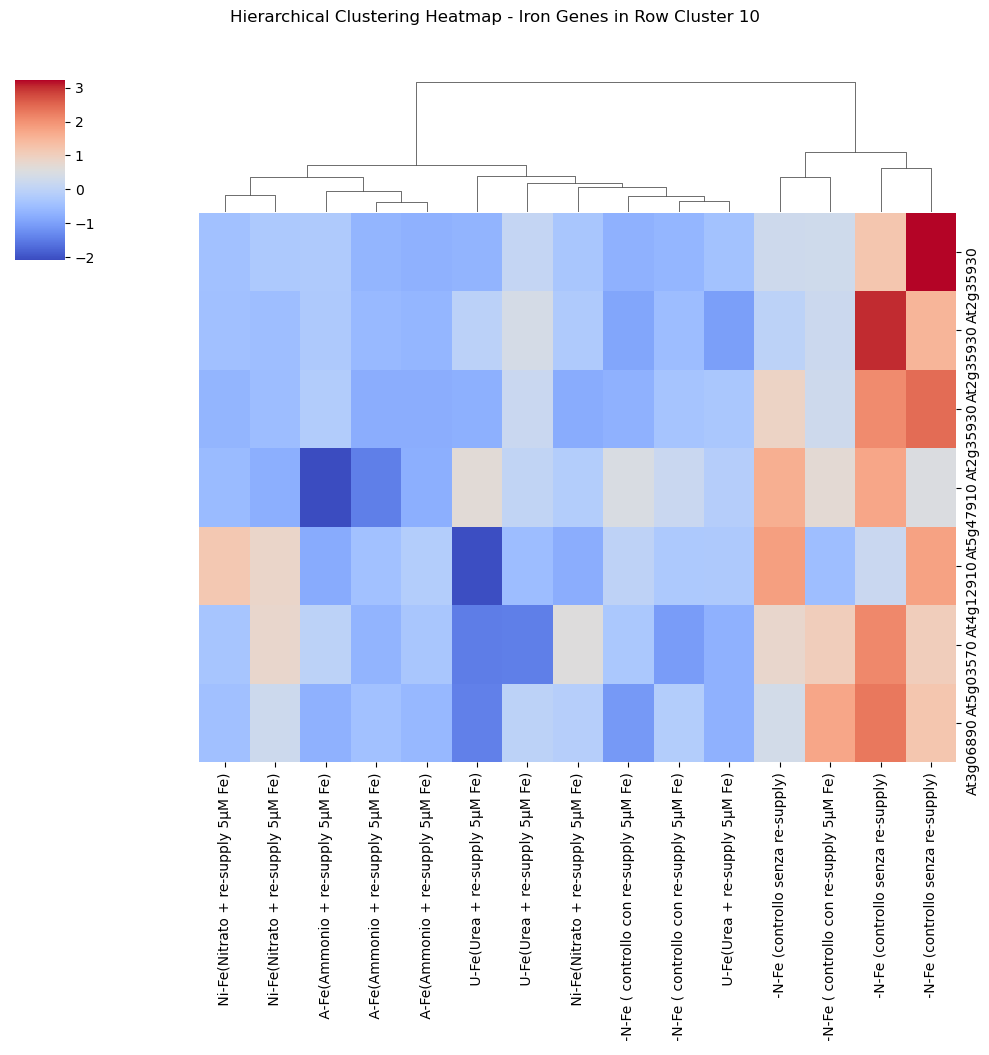

In [21]:
# Hierarchical Clustering and Dendrogram
for i, row_cluster_df in enumerate(row_clusters):
    iron_gene_ids_in_cluster = [gene for gene in row_cluster_df.index if gene_mapping.get(gene[:14], "").lower() in iron_genes_lower]
    
    if iron_gene_ids_in_cluster:
        iron_gene_ids_original = [iron_genes_dict.get(gene_mapping.get(gene[:14], "").lower(), gene) for gene in iron_gene_ids_in_cluster]
        filtered_cluster_df = row_cluster_df.loc[iron_gene_ids_in_cluster]
        filtered_cluster_df.index = iron_gene_ids_original

        if not filtered_cluster_df.empty:
            col_linkage = linkage(filtered_cluster_df.T, method='ward')

            # Create a clustered heatmap
            g = sns.clustermap(filtered_cluster_df, col_cluster=True, row_cluster=False, col_linkage=col_linkage, cmap='coolwarm', cbar_kws={"orientation": "vertical"})
            g.fig.suptitle(f'Hierarchical Clustering Heatmap - Iron Genes in Row Cluster {i + 1}', y=1.05)
            plt.show()
